## **What's word2Vec?**

If you want to turn words into numbers, and you want those numbers to make sense, then use words embeddings as your input data to train your model, which are produced through the Machine learning process called **"Word2Vec"**, it will later help us to form similarities and comparisons between words

So if you want to plug words into a Neural Network, or some othe ML model we need a way to do that(turning words into numbers) because unfortunately ML algorithms or machines overall don't work well with words, so how will do that?

Can we assign random numbers to words?
Would that cause a problem? So how we will decide what words are similar and are used in similar contexts?
let's see first a glance on history of Word2Vec:

##### **History of Word2Vec**

Word2Vec has revolutionized the field of NLP by providing an efficient and scalable approach to learn word embeddings. Before Word2Vec, traditional methods for word representations, such as one-hot encoding or co-occurrence matrices, were limited in their ability to capture semantic relationships. Word2Vec addressed these limitations by using neural networks to learn distributed representations.

Tomas Mikolov and his team at Google introduced two models for training word embeddings with Word2Vec: the Continuous Bag of Words (CBOW) model and the Skip-gram model. These models gained significant attention and popularity due to their simplicity and efficiency.

Let's explore two common examples and compare the approach of Word2Vec with another traditional approach using code snippets.

######  **Example 1: Word Analogies**

Word analogies involve finding a word that is to a given word as another word is to a target word. For instance, "man" is to "woman" as "king" is to ____. Word2Vec can capture these analogies by performing vector arithmetic.

**Word2Vec Approach:**

In [1]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import modules
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

In [3]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [4]:
# we will use this custom data for this approach
sentences = [
    ['king', 'queen', 'man', 'woman'],
    ['apple', 'orange', 'banana'],
    ['man', 'woman', 'child']
]

In [5]:
# Training Word2Vec model
model = Word2Vec(sentences,min_count=1)

In [6]:
# Word2Vec approach
result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'])
analogy_word = result[0][0]
print("Analogy: king - man + woman =", analogy_word)
result

Analogy: king - man + woman = queen


[('queen', 0.07284720242023468),
 ('child', -0.016948837786912918),
 ('orange', -0.03275773301720619),
 ('apple', -0.06849467009305954),
 ('banana', -0.10425539314746857)]

In this example, we use the most_similar method of the Word2Vec model to find the most similar word to the vector obtained by adding the vectors of 'woman' and 'king' and subtracting the vector of 'man'

Note: Word2vec accepts several parameters that affect both training speed and quality, yet if you change in this case the min_count to a value that doensn't match your dataset the model will not give you any result

**Traditional Approach (Cosine Similarity):**

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Traditional approach using cosine similarity
king_vector = model.wv['king'] - model.wv['man'] + model.wv['woman']
similarity_scores = cosine_similarity(king_vector.reshape(1, -1), model.wv.vectors)
most_similar_word_index = np.argsort(-similarity_scores)[0][0]  # Retrieve the most similar word index
analogy_word = model.wv.index_to_key[most_similar_word_index]
print("Analogy: king - man + woman =", analogy_word)


Analogy: king - man + woman = king


This showcases the limitations of the traditional approach in capturing precise analogies compared to Word2Vec. while Word2Vec's strength lies in capturing semantic relationships between words and providing meaningful analogies based on the learned word embeddings

##### **Example2:Finding Similar Words**

**Word2Vec Approach**

In [8]:
# Word2Vec approach
# Training Word2Vec model
model1 = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
similar_words = model1.wv.most_similar('computer')
print("Similar words to 'computer':\n", similar_words)

Similar words to 'computer':
 [('system', 0.21617139875888824), ('survey', 0.04468922317028046), ('interface', 0.015203381888568401), ('time', 0.0019510635174810886), ('trees', -0.03284316882491112), ('human', -0.07424270361661911), ('response', -0.09317591041326523), ('graph', -0.09575342386960983), ('eps', -0.10513808578252792), ('user', -0.16911619901657104)]


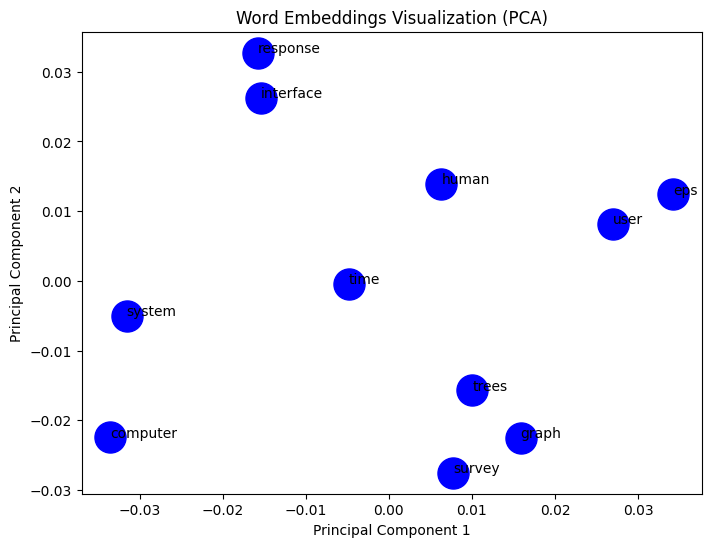

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

target_word = 'computer'
similar_words = [word for word, _ in model1.wv.most_similar(target_word)]
words = [target_word] + similar_words
word_vectors = [model1.wv[word] for word in words]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='b', s =500)

# Add labels to each point
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=10)

# Set plot title and axis labels
plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


**Cosine Similarity Approach**

In [10]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Traditional approach using cosine similarity
# we focus on the target word 'computer' 
computer_vector = model1.wv['computer']
# Get similar words and their vectors
similarity_scores = cosine_similarity(computer_vector.reshape(1, -1), model1.wv.vectors)
most_similar_word_indices = np.argsort(-similarity_scores)[0][:5]
similar_words = [model1.wv.index_to_key[index] for index in most_similar_word_indices]
print("Similar words to 'computer':", similar_words)


Similar words to 'computer': ['computer', 'system', 'survey', 'interface', 'time']


While the traditional approach can achieve similar results, the Word2Vec approach using the most_similar method simplifies the process by directly providing the most similar words.

##### **Another example**

In [11]:
#Using google news
import gensim.downloader as api
mdl = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [12]:
#measuring the distance between the vectors of car and cat
mdl.distance('car','cat')

0.7847181558609009

In [13]:
mdl.distance('dog','cat')

0.23905426263809204

In [14]:
mdl.similar_by_word('cat')

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [15]:
# We can also represent the example of king, woman and man with this simple line
print(mdl.most_similar_cosmul(positive=['king', 'woman'], negative = ['man']))

[('queen', 0.9314123392105103), ('monarch', 0.858533501625061), ('princess', 0.8476566076278687), ('Queen_Consort', 0.8150269985198975), ('queens', 0.8099815249443054), ('crown_prince', 0.8089976906776428), ('royal_palace', 0.8027306795120239), ('monarchy', 0.8019613027572632), ('prince', 0.800979733467102), ('empress', 0.7958389520645142)]


the method "most_similar_cosmul"  produces Probability distribution that shows that the word "queen" is best value predicted

In [16]:
print(mdl.most_similar_cosmul(positive=['Tokyo', 'Morocco'], negative = ['Japan']))

[('Marrakesh', 0.9279997944831848), ('Rabat', 0.9062004685401917), ('Marrakech', 0.8927013874053955), ('Casablanca', 0.8837622404098511), ('El_Ayoun', 0.868589460849762), ('Paris', 0.8604151010513306), ('Casablanca_Rabat', 0.8583678603172302), ('Moroccan', 0.8522422909736633), ('Casablanca_Morocco', 0.8474143147468567), ('Algiers', 0.8403770923614502)]


#### **Understanding Continuous bag-of-words and skip-gram model**

Imagine we have a neural network with input layer, hidden layer and an output layer, we aim by using the network to predict a word that we call **the target word** given its surrounding words that we call **the context words**

Let's consider this example:
"I love reading books in my free time."


let's take the word "reading" as the target word. if we set the window size as 2 which means we use two words before and two words after as context words, so we take {I,love} and {books,in}

In [17]:
sentence = "I love reading books in my free time"

We're gonna just basic stuff of preprocessing

In [19]:
#convert to lowercase
sentence = str(sentence).lower()
tokenized_sentence = sentence.split()

In [20]:
tokenized_sentence

['i', 'love', 'reading', 'books', 'in', 'my', 'free', 'time']

**Building the model**

It's important to understand what hyperparameters we will put as aruguments to our model, for example here:


*   Window size, already explained
*   Min_count: min frequency of words, if some word's occurences less than this value, we gonna ignore it
*   sg=1 implies we use skip-gram method for training if sg=0 then it implies we use CBOW for training




In [41]:
model = Word2Vec([tokenized_sentence],sg=0,window=2, min_count=1)

In [42]:
# Get the word vector for a specific word
word = "books"
word_vector = model.wv[word]

print(f"Word vector for '{word}': {word_vector}")

Word vector for 'books': [-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193   0.00583312
  0.00119818  0.00210273 -0.00411039  0.00722533 -0.00630704  0.00464722
 -0.00821997  0.00203647 -0.00497705 -0.00424769 -0.00310898  0.00565521
  0.0057984  -0.00497465  0.00077333 -0.00849578  0.00780981  0.00925729
 -0.00274233  0.00080022  0.00074665  0.00547788 -0.00860608  0.00058446
  0.00686942  0.00223159  0.00112468 -0.00932216  0.00848237 -0.00626413
 -0.00299237  0.00349379 -0.00077263  0.00141129  0.00178199 -0.0068289
 -0.00972481  0.00904058  0.00619805 -0.00691293  0.00340348  0.00020606
  0.00475375 -0.00711994  0.00402695  0.00434743  0.00995737 -0.00447374
 -0.00138926 -0.00731732 -0.00969783 -0.00908026 -0.00102275 -0.00650329
  0.00484973 -0.00616403  0.00251919  0.00073944 -0.00339215 -0.00097922
  0.00997913  0.00914589 -0.00446183  0.00908303 -0.00564176  0.00593092
 -0.00309722  0.00343175  0.00301723  0.00690046 -0.00237388  0.00877504
  0.00758943 -0.00954765 -0

You may ask where we get that from?
The word vectors or word embeddings are produced as the weigths of the hidden layer neurons, which represent the word vectors for the context words

In [43]:
print(f"\nSimilar words to '{word}':")
for similar_word, similarity_score in similar_words:
    print(f"{similar_word}: {similarity_score}")


Similar words to 'books':
my: 0.17018885910511017
reading: 0.13887980580329895
love: 0.03476494550704956
free: 0.004503022879362106
time: -0.027750348672270775
i: -0.028491012752056122
in: -0.04461711645126343


### **Conclusion**



*   Word2Vec is two layer neural network to generte word embeddings given a text corpus
*   The word2vec algorithm produces word embeddings, which are vector representations of words in a high-dimensional space

*   The word2vec algorithms include skip-gram and CBOW models
*  The skip-gram model predicts the context words (surrounding words) given a target word, while the CBOW model predicts the target word given the context words





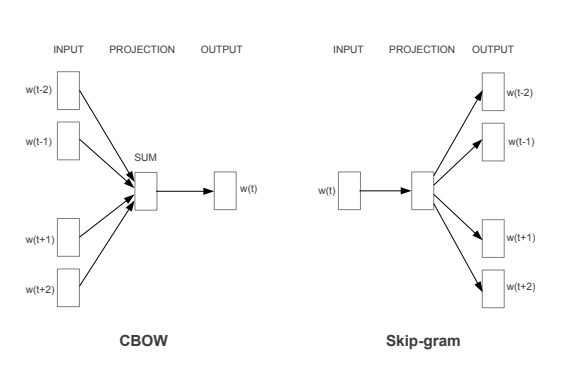